# Valorant Project Data Collection

<hr>  
  
### Approach Deliberations [What Models to Use]  



* Independence of features from one another  
> one of the main concerns for the project; the agents selected are dependent on the map, the agents selected are dependent on the rank, and the agents selected are dependent on what agents have already been (or indicated to be) selected.  
>> the extent of independence have to be determined since some algorithms do not function well with features dependent on other features  
>>> Need to use Chi Square Test of Independence  
  
* Problem with not having a large and diverse sample size  
> the players selected are within a Bronze to Diamond Range, mostly within the Silver and Gold area  
> chi2 test requires at least 5 in each cell to be effective  
  
**To work around the limited matches per account, I could keep a database in my pc; keep a csv which keeps track of the info, updating the master list of match ids that have already been logged to avoid duplicates in scenarios where someone has not played since the last check**  
> depending on the size of the csv; all data is preferably stored, not just the ones needed for the features I have right now since additional features may be needed as I go further along

<hr>  
  
#####  Need a Classification Algorithm  



> Prediction of categorical values (Win / Lose)  
>> Looking for those that provide the probability belonging to each category (Win Chance)
>>> Supervised Learning since we have the match outcome available

* Naive Bayes: Can't Use 
> Requires that features are independent of other features  
* Logistic Regression: Possible  
> Sigmoid Function Regression that returns probability belonging to a binary category based on the best line of fit  
* Decision Tree / Random Forest: Possible  
> apply filters/conditions that will make it so that the data point is most likely one class
* SVM: Possible  
>  Spatial manipulation into higher dimensions in order to divide categories with a hyperplane 
* KNN: Possible  
> Take the nearest k data points and determine the class based on the points similar to the target point  
  
**Use the following: LogReg, Forest, SVM, KNN**

<hr>  
  
### Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl



runs = []

with open("C:\\Users\\Binaryxx Sune\\Documents\\Programming\\personal_projects\\data\\competitive_data.pkl", "rb") as comp_data_file:
    try:
        while True:
                runs.append(pkl.load(comp_data_file))
    except:
        pass



matches = sum(runs, [])
agent = []
val_map = []
rank = []
outcome = []



for match in matches:
        # get map played by each player
        for i in range(10):
            val_map.append(match["metadata"]["map"])

        # get agent selected by each player and their rank
        for player in match["players"]["all_players"]:
            agent.append(player["character"])
            rank.append(player["currenttier"])

        # get match outcome of each player
        for player in match["players"]["all_players"]:
            player_team = player["team"].lower()
            outcome.append(match["teams"][player_team]["has_won"])



data_dict = {"agent": agent, "val_map" : val_map, "rank": rank, "win": outcome}

val_data = pd.DataFrame(data_dict)



val_data

,agent,val_map,rank,win
0,Reyna,Haven,14,True
1,Phoenix,Haven,14,True
2,Fade,Haven,13,True
3,Killjoy,Haven,12,False
4,Jett,Haven,15,False
...,...,...,...,...
1165,Sage,Ascent,16,True
1166,Sova,Ascent,16,True
1167,Cypher,Ascent,16,True
1168,Breach,Ascent,15,False


<hr>  
  
### Features  

* Agent 
> Class 
* Map
* Rank

#### Delibrerations  

Question: How can I set myself up for success in a competitive game of Valorant?  
> 2 scenarios: Queueing with friends / Solo Queuing  
>> * The rank will be non negotiable and not within the player(s) control to influence  
>> * The map can technically be negotiable by dodging maps with lower win rates but not in the spirit of improving the player's skill  
  
With the 2 scenarios given, the team comp can be completely controlled or the player can only select their own and can fill in order to salvage a potentially bad team comp  
> * For the scenario with the 5 stack (best case scenario), the group will want to model the team comp that experiences the most success, assuming everyone can comfortably play what is needed  
> * For the solo queue scenario, the 4 other agents are more or less a given [can maybe influence others to select from a limited pool]; the player should select that maximizes win rate based on the predetermined 4 other agents  
  


Would need to separate the data into different segments:  
> separate by rank, then separate by map  
>> *example:* Bronze Fracture, Bronze Ascent, Silver Fracture, Silver Ascent

<hr>  
  
### EDA

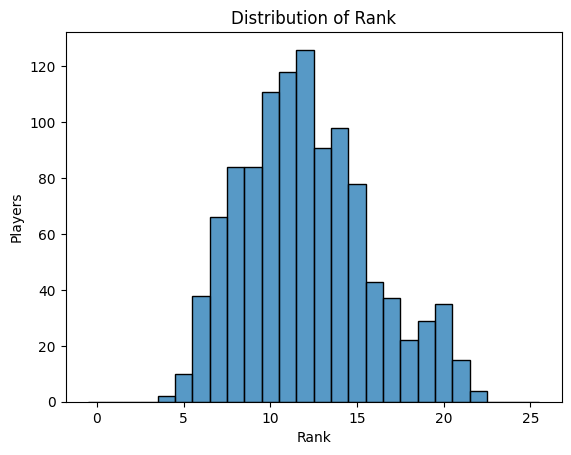

In [2]:
# removing 0s since that means uncalibrated

calibrated_rank = val_data[val_data["rank"] != 0]
rank_hist = sns.histplot(data = calibrated_rank, x = "rank", binrange = [0, 25], bins = 25, discrete = True)


plt.xlabel("Rank")
plt.ylabel("Players")
plt.title("Distribution of Rank")

plt.show()

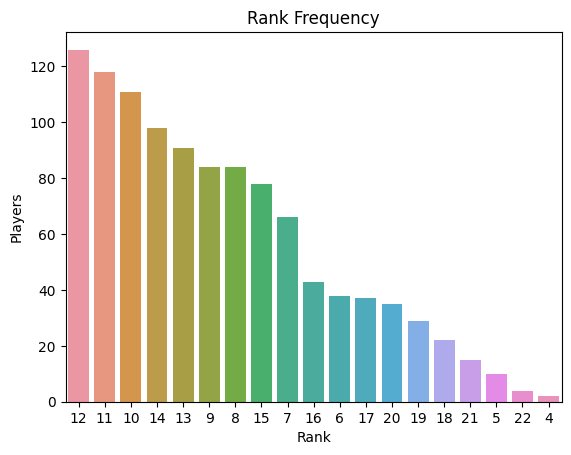

In [3]:
calibrated_rank = val_data[val_data["rank"] != 0]
rank_freq = list(calibrated_rank["rank"].value_counts().index)
rank_hist = sns.countplot(data = calibrated_rank, x = "rank", order = rank_freq)


plt.xlabel("Rank")
plt.ylabel("Players")
plt.title("Rank Frequency")

plt.show()

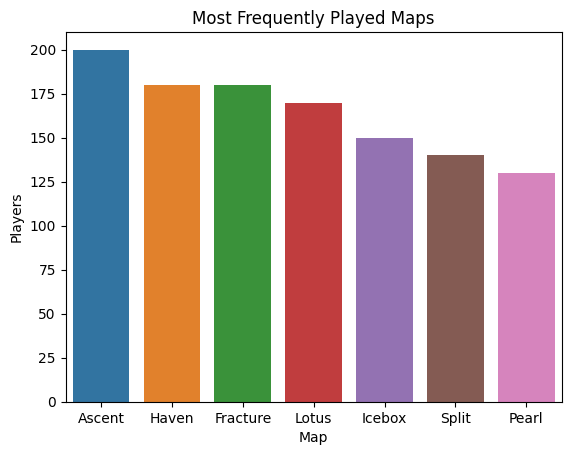

In [4]:
# removing breeze and bind since it's out of competitive rotation

cycle_map = val_data[~val_data["val_map"].isin(["Breeze", "Bind"])]
map_freq = list(cycle_map["val_map"].value_counts().index)
agent_hist = sns.countplot(data = cycle_map, x = "val_map", order = map_freq)

plt.xlabel("Map")
plt.ylabel("Players")
plt.title("Most Frequently Played Maps")

plt.show()

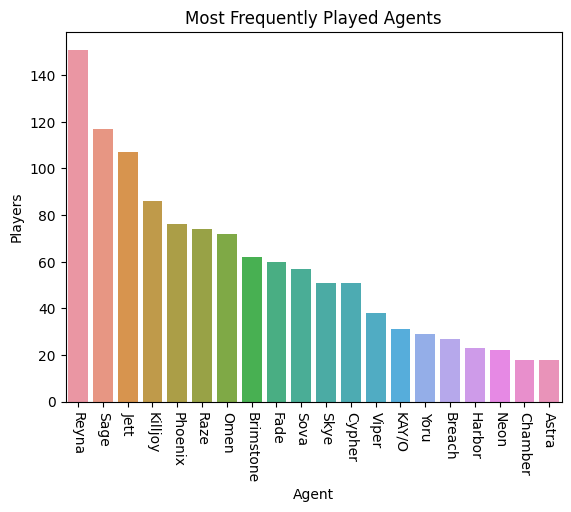

In [5]:
agent_freq = list(val_data["agent"].value_counts().index)
agent_hist = sns.countplot(data = val_data, x = "agent", order = agent_freq)

plt.xlabel("Agent")
agent_hist.tick_params(axis='x', rotation = 270)
plt.ylabel("Players")
plt.title("Most Frequently Played Agents")

plt.show()